In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [21]:
# Load the ADNI Data
data=pd.read_excel('ADNI_ICM_random200.xlsx')
data=data.replace({'\'':''},regex=True) #delete the ' ' of values
data = data.rename(columns=lambda x:x.strip('\'')) #delete the '' of the keys
#print(data)
# Select columns as need
rolls=['Amyg_R','Fimbria_R','Hippo_R','Mammillary_R','Amyg_L','Fimbria_L','Hippo_L','Mammillary_L']
p_info=['Subject_ID', 'Gender', 'Age', 'Diagnosis']
cols=np.concatenate((p_info,rolls),axis=0)
#print(cols)
dat_need=data[cols]
#print(dat_need)

In [22]:
# Load the ADNI Data
data=pd.read_excel('ADNI_ICM_random200.xlsx')
data=data.replace({'\'':''},regex=True) #delete the ' ' of values
data = data.rename(columns=lambda x:x.strip('\'')) #delete the '' of the keys
#print(data)
# Select columns as need
rolls=['Amyg_R','Fimbria_R','Hippo_R','Mammillary_R','Amyg_L','Fimbria_L','Hippo_L','Mammillary_L']
p_info=['Subject_ID', 'Gender', 'Age', 'Diagnosis']
cols=np.concatenate((p_info,rolls),axis=0)
#print(cols)
dat_need=data[cols]
#print(dat_need)

In [23]:
data_volume=dat_need.copy()
# Sum the value of each side
Amyg=np.zeros(200)
Fimbria=np.zeros(200)
Mammlillary=np.zeros(200)
Hippo=np.zeros(200)

data_volume['Amyg']=data_volume.Amyg_R+data_volume.Amyg_L
data_volume['Fimbria']=data_volume.Fimbria_R+data_volume.Fimbria_L
data_volume['Mammillary']=data_volume.Mammillary_R+data_volume.Mammillary_L
data_volume['Hippo']=data_volume.Hippo_R+data_volume.Hippo_L

In [24]:
#quantization
for i in range(0,200):
    if data_volume.Diagnosis[i]=='AD/MCI':
        data_volume.Diagnosis[i]=1
    elif data_volume.Diagnosis[i]=='NORMAL':
        data_volume.Diagnosis[i]=0


D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
print(data_volume)
sets=['Amyg_R','Amyg_L','Amyg','Fimbria_R','Fimbria_L','Fimbria',
'Hippo_R','Hippo_L','Hippo','Mammillary_R','Mammillary_L','Mammillary']

#Sum up the whole limbic system
Whole_value=np.zeros(200)
for i in range(0,8):
    Whole_value=Whole_value+data_volume[rolls[i]]
    
#p-value test
data_volume['Limbic_System']=Whole_value
p_value=[]
sets.append('Limbic_System')
for disease in sets:
    #print(disease)
    (r, p)= scipy.stats.pearsonr(data_volume['Diagnosis'], data_volume[disease])
    #print(r)
    p_value.append(p)   

      Subject_ID Gender      Age Diagnosis  Amyg_R  Fimbria_R  Hippo_R  \
0      Subject_1      M  69.6712         1    1725          8     3041   
1      Subject_2      F  85.3836         1    1590          0     2685   
2      Subject_3      F  86.2904         0    1803          5     3875   
3      Subject_4      M  73.9342         0    1868          4     3684   
4      Subject_5      M  79.9918         1    1275          0     2549   
5      Subject_6      F  82.9041         1    1664          6     2952   
6      Subject_7      F  88.4521         1     930          0     2236   
7      Subject_8      M  74.4822         1    1224          3     2968   
8      Subject_9      F  75.6192         0    1905         25     3591   
9     Subject_10      M  64.0384         1    1804          9     3704   
10    Subject_11      F  78.7753         0    1552          0     3051   
11    Subject_12      M  84.9260         1    1665          8     3437   
12    Subject_13      F  70.6932      

                   p_values
Amyg_R         1.897439e-06
Amyg_L         3.775390e-06
Amyg           8.054100e-07
Fimbria_R      5.542213e-06
Fimbria_L      1.794919e-06
Fimbria        7.878850e-08
Hippo_R        1.108254e-03
Hippo_L        1.029749e-03
Hippo          6.824055e-04
Mammillary_R   4.592170e-01
Mammillary_L   5.308413e-01
Mammillary     9.623898e-01
Limbic_System  2.785305e-05


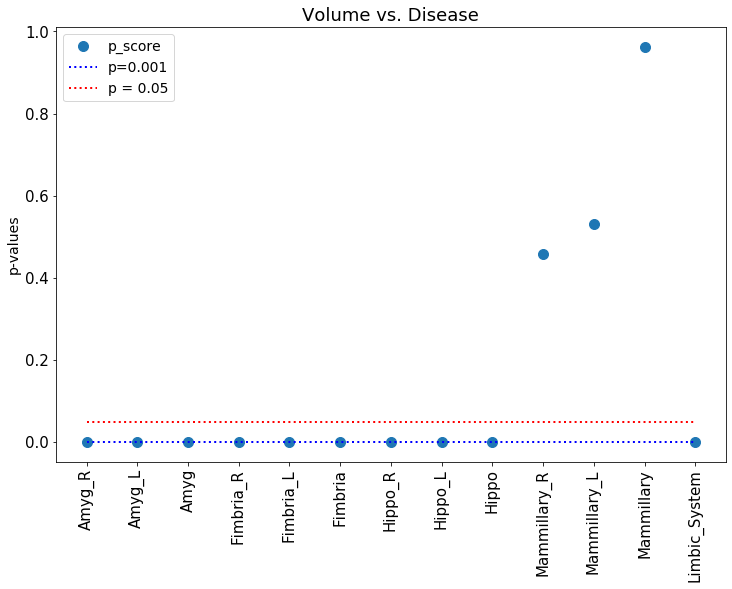

In [26]:
#plot P-values
p_values = pd.DataFrame({'p_values': p_value}, index=sets)   
plt.figure(figsize=(12,8))
plt.plot(p_values['p_values'],'.',markersize = 20)
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('p-values', fontsize=14)
plt.plot(np.arange(p_values.shape[0]), np.full(p_values.shape[0],0.001), 'b:', linewidth=2)
plt.plot(np.arange(p_values.shape[0]), np.full(p_values.shape[0],0.05), 'r:', linewidth=2)
plt.legend(['p_score','p=0.001','p = 0.05'], loc='upper left', fontsize=14) 
plt.title('Volume vs. Disease',fontsize = 18);
print(p_values)

In [28]:
# P-test
for i in range(len(p_values)):
    if p_values.p_values[i] <= 0.001:
        print('The volume of the '+sets[i]+' has significant difference between ADNI Group and Control Group in the dataset.')
    elif p_values.p_values[i] <= 0.05:
        print('The volume of the '+sets[i]+' has difference between ADNI Group and Control Group in the dataset.')
    else:
        print('There is no significant difference between the average volume of the '+sets[i]+' in the ADNI Group and Control Group in the dataset.')

The volume of the Amyg_R has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Amyg_L has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Amyg has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Fimbria_R has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Fimbria_L has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Fimbria has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Hippo_R has difference between ADNI Group and Control Group in the dataset.
The volume of the Hippo_L has difference between ADNI Group and Control Group in the dataset.
The volume of the Hippo has significant difference between ADNI Group and Control Group in the dataset.
There is no significant difference between the average volume of the Mamm